<a href="https://colab.research.google.com/github/lin3372/BK_Graph_Machine_Learning_Pkt21/blob/main/01_03_Graph_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pre-requisite 
1. Install and import lib
2. define colors

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import scipy as scipy
import matplotlib as matlib
import matplotlib.pyplot as plt

np_ver, pd_ver, nx_ver, matlib_ver, scipy_ver = \
  np.__version__, pd.__version__, nx.__version__, matlib.__version__, scipy.__version__

print(f"np_ver={np_ver}")
print(f"pd_ver={pd_ver}")
print(f"nx_ver={nx_ver}")
print(f"matlib_ver={matlib_ver}")
print(f"scipy_ver={scipy_ver}")

np_ver=1.19.5
pd_ver=1.1.5
nx_ver=2.6.3
matlib_ver=3.2.2
scipy_ver=1.4.1


In [2]:
default_edge_color = 'gray'
default_node_color = '#407cc9'
enhanced_node_color = '#f5b042'
enhanced_edge_color = '#cc2f04'

In [3]:
## !pip install networkx==2.5 
## !pip install matplotlib==3.2.2 
## !pip install pandas==1.1.3 
## !pip install scipy==1.6.2 

In [4]:
import networkx as nx
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline


## Chapter 1.2: Graph properties


1. **• Integration metrics:** These measure how nodes tend to be interconnected with each other.
2. **• Segregation metrics:** These quantify the presence of groups of interconnected nodes, known as communities or modules, within a network.
3.  **• Centrality metrics:** These assess the importance of individual nodes inside a network.
4. **• Resilience metrics:** These can be thought of as a measure of how much a network is able to maintain and adapt its operational performance when facing failures or other adverse conditions.


## Graph Drawing Functions

### draw a simple graph

In [5]:
# draw a simple graph
def draw_graph(G, node_names={}, filename=None, node_size=50):
    pos_nodes = nx.spring_layout(G)
    nx.draw(G, pos_nodes, with_labels=False, node_size=node_size, edge_color='gray')
    
    pos_attrs = {}
    for node, coords in pos_nodes.items():
        pos_attrs[node] = (coords[0], coords[1] + 0.08)
        
    nx.draw_networkx_labels(G, pos_attrs, labels=node_names, font_family='serif')
    
    plt.axis('off')
    axis = plt.gca()
    axis.set_xlim([1.2*x for x in axis.get_xlim()])
    axis.set_ylim([1.2*y for y in axis.get_ylim()])
    
    if filename:
        plt.savefig(filename, format="png")


### draw enhanced path on the graph

In [6]:
# draw enhanced path on the graph
def draw_enhanced_path(G, path_to_enhance, node_names={}, filename=None):
    path_edges = list(zip(path,path[1:]))
    pos_nodes = nx.spring_layout(G)

    plt.figure(figsize=(4,4),dpi=100)
    pos_nodes = nx.spring_layout(G)
    nx.draw(G, pos_nodes, with_labels=False, node_size=50, edge_color='gray')
    
    pos_attrs = {}
    for node, coords in pos_nodes.items():
        pos_attrs[node] = (coords[0], coords[1] + 0.08)
        
    nx.draw_networkx_labels(G, pos_attrs, labels=node_names, font_family='serif')
    nx.draw_networkx_edges(G,pos_nodes,edgelist=path_edges, edge_color='#cc2f04', style='dashed', width=2.0)
    
    plt.axis('off')
    axis = plt.gca()
    axis.set_xlim([1.2*x for x in axis.get_xlim()])
    axis.set_ylim([1.2*y for y in axis.get_ylim()])
    
    if filename:
        plt.savefig(filename, format="png")

## Integration metrics

1.   Distance, path, and shortest path
2.   Characteristic path length
3.   Efficiency - Global Efficiency and Local Efficiency



### Shortest path

In [7]:
G = nx.Graph()
nodes = {1:'Dublin',2:'Paris',3:'Milan',4:'Rome',5:'Naples',6:'Moscow',7:'Tokyo'}
G.add_nodes_from(nodes.keys())
G.add_edges_from([(1,2),(1,3),(2,3),(3,4),(4,5),(5,6),(6,7),(7,5)])

In [8]:
# test code
# list(nodes.values())[0]

In [9]:
path = nx.shortest_path(G,source=1,target=7)
print(path)

[1, 3, 4, 5, 7]


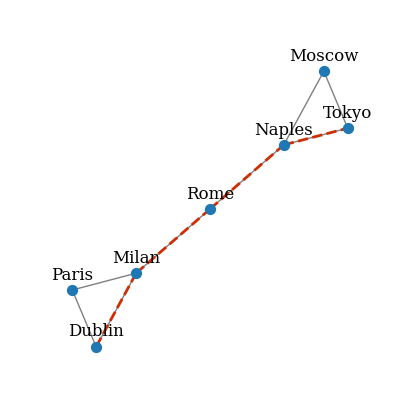

In [10]:
draw_enhanced_path(G, path, node_names=nodes,filename='shortest_path.png')

### Characteristic path length
The ***characteristic path*** length is defined as the average of all the shortest path lengths between all possible pair of nodes.

This is one of the most commonly used measures of how efficiently information is spread across a network. Networks having shorter characteristic path lengths promote the quick transfer of information and reduce costs.

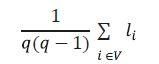

In [11]:
# Characteristic path length can be computed through networkx using the following function:
char_path = nx.average_shortest_path_length(G)
print(f"characterisitc path len (by nx)= {char_path}")

### ************************************************************
## manually calculate the characterisitic path length
vPath = np.zeros(len(nodes)+1, dtype=float)
for srcNode in range(1, len(nodes)+1):
  for dstNode in range(1, len(nodes)+1):
    pathlen = nx.shortest_path_length(G, srcNode, dstNode)
    #print(f"shortest path {srcNode} to {dstNode} = {nx.shortest_path_length(G, srcNode, dstNode)}")
    vPath[srcNode] = vPath[srcNode] + nx.shortest_path_length(G, srcNode, dstNode)
  print(f"TotPath({list(nodes.values())[srcNode-1]}) = {vPath[srcNode]}")

TotPathLen = sum(vPath)
print(f"characterisitc path len (by maunal)= {TotPathLen/(len(nodes)*(len(nodes)-1))}")  

characterisitc path len (by nx)= 2.1904761904761907
TotPath(Dublin) = 15.0
TotPath(Paris) = 15.0
TotPath(Milan) = 11.0
TotPath(Rome) = 10.0
TotPath(Naples) = 11.0
TotPath(Moscow) = 15.0
TotPath(Tokyo) = 15.0
characterisitc path len (by maunal)= 2.1904761904761907


However, this metric cannot be always defined since it is not possible to compute a path among all the nodes in disconnected graphs. For this reason, network efficiency is also widely used.

### Efficiency - Global Efficiency and Local Efficiency

Global efficiency is the average of the inverse shortest path length for all pairs of nodes.  Such a metric can be seen as a measure of how efficiently information is exchanged across a network. Consider that ***l*** is the shortest path between a node and a node . The network efficiency is defined as follows:

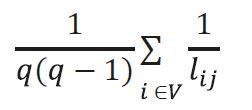

The local efficiency of a node can be computed by considering only the neighborhood of the node in the calculation, without the node itself

In [12]:
G = nx.Graph()
nodes = {1:'Dublin',2:'Paris',3:'Milan',4:'Rome',5:'Naples',6:'Moscow',7:'Tokyo'}
G.add_nodes_from(nodes.keys())
G.add_edges_from([(1,2),(1,3),(2,3),(3,4),(4,5),(5,6),(6,7),(7,5)])

print(f"global efficiency(by nx) = {nx.global_efficiency(G)}")
print(f"local efficiency(by nx) = {nx.local_efficiency(G)}")

global efficiency(by nx) = 0.611111111111111
local efficiency(by nx) = 0.6666666666666667


In [13]:
### ************************************************************
## manually calculate the global efficiency and local efficiency
vEffGlobl = np.zeros(len(nodes)+1, dtype=float)
vEffLocal = np.zeros(len(nodes)+1, dtype=float)
for srcNode in range(1, len(nodes)+1):
  for dstNode in range(1, len(nodes)+1):
    if (srcNode != dstNode):
      effPath = 1.0 / nx.shortest_path_length(G, srcNode, dstNode)
      #pathlen = nx.shortest_path_length(G, srcNode, dstNode)
      #print(f"shortest path {srcNode} to {dstNode} = {nx.shortest_path_length(G, srcNode, dstNode)}")
      vEffGlobl[srcNode] = vEffGlobl[srcNode] + effPath
  print(f"Global Efficiency({list(nodes.values())[srcNode-1]}) = {vEffGlobl[srcNode]}")

TotEffGlobl = sum(vEffGlobl)
print("")
print(f"global efficiency(by maunal)= {TotEffGlobl/(len(nodes)*(len(nodes)-1))}")  

Global Efficiency(Dublin) = 3.3333333333333335
Global Efficiency(Paris) = 3.3333333333333335
Global Efficiency(Milan) = 4.166666666666667
Global Efficiency(Rome) = 4.0
Global Efficiency(Naples) = 4.166666666666666
Global Efficiency(Moscow) = 3.333333333333333
Global Efficiency(Tokyo) = 3.333333333333333

global efficiency(by maunal)= 0.611111111111111


#### higher efficiency graph (fully connected)

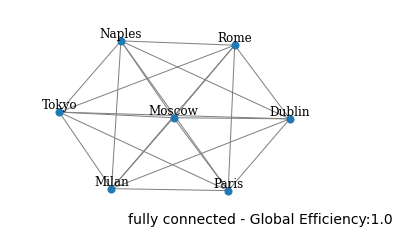

In [14]:
# higher efficiency
G = nx.complete_graph(n=7)
nodes = {0:'Dublin',1:'Paris',2:'Milan',3:'Rome',4:'Naples',5:'Moscow',6:'Tokyo'}

ge = round(nx.global_efficiency(G),2)

# place the text box in axes coords
ax = plt.gca()
ax.text(-.4, -1.3, "fully connected - Global Efficiency:{}".format(ge), fontsize=14, ha='left', va='bottom');

draw_graph(G,node_names=nodes,filename='efficiency.png')

#### lower efficiency (sparsely connected)

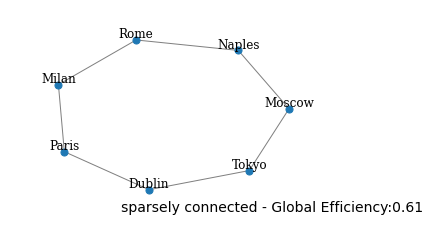

In [15]:
# lower efficiency
G = nx.cycle_graph(n=7)
nodes = {0:'Dublin',1:'Paris',2:'Milan',3:'Rome',4:'Naples',5:'Moscow',6:'Tokyo'}

le = round(nx.global_efficiency(G),2)

# place the text box in axes coords
ax = plt.gca()
ax.text(-.4, -1.3, "sparsely connected - Global Efficiency:{}".format(le), fontsize=14, ha='left', va='bottom');

draw_graph(G, node_names=nodes,filename='less_efficiency.png')

## Segregation metrics

1.   Clustering coefficient
2.   Centrality


### Clustering coefficient
The clustering coefficient is a measure of how much nodes cluster together. It is defined as the fraction of triangles (complete subgraph of three nodes and three edges) around a node and is equivalent to the fraction of the node's neighbors that are neighbors of each other.

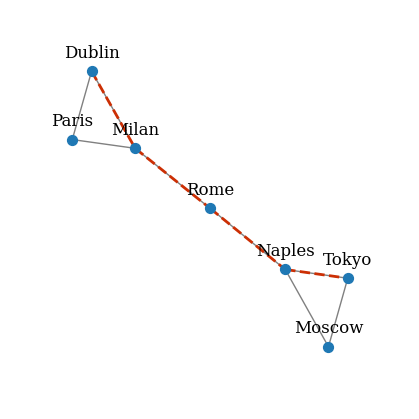

In [16]:
G = nx.Graph()
nodes = {1:'Dublin',2:'Paris',3:'Milan',4:'Rome',5:'Naples',6:'Moscow',7:'Tokyo'}
G.add_nodes_from(nodes.keys())
G.add_edges_from([(1,2),(1,3),(2,3),(3,4),(4,5),(5,6),(6,7),(7,5)])

draw_enhanced_path(G, path, node_names=nodes,filename='clustering.png')

#### global clustering coefficient

In [17]:
## global clustering coefficient
nx.average_clustering(G)

0.6666666666666667

#### local clustering coefficient

In [18]:
## local clustering coefficient
cluster_local=nx.clustering(G)
print(f"cluster_local={cluster_local}")
nodes.items

#zip(list(nodes.values()), cluster_local)
#z = list(zip(list(nodes.values()), cluster_local.values())

#nodes.values()
#print(list(nodes.values())

cluster_local

cluster_local={1: 1.0, 2: 1.0, 3: 0.3333333333333333, 4: 0, 5: 0.3333333333333333, 6: 1.0, 7: 1.0}


{1: 1.0,
 2: 1.0,
 3: 0.3333333333333333,
 4: 0,
 5: 0.3333333333333333,
 6: 1.0,
 7: 1.0}

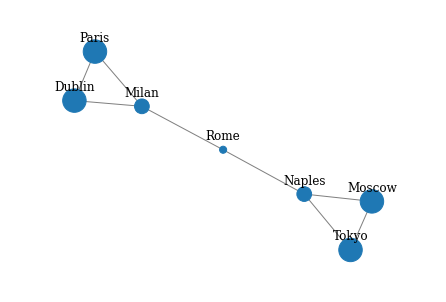

In [19]:
cc = nx.clustering(G)
node_size=[(v + 0.1) * 500 for v in cc.values()]
draw_graph(G, node_names=nodes, node_size=node_size,filename='clustering.png')

## Centrality
These assess the importance of individual nodes inside a network

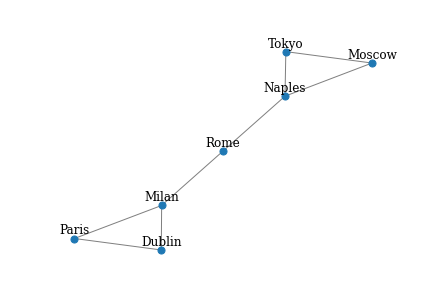

In [20]:
G = nx.Graph()
nodes = {1:'Dublin',2:'Paris',3:'Milan',4:'Rome',5:'Naples',6:'Moscow',7:'Tokyo'}
G.add_nodes_from(nodes.keys())
G.add_edges_from([(1,2),(1,3),(2,3),(3,4),(4,5),(5,6),(6,7),(7,5)])
draw_graph(G, node_names=nodes,filename='centrality.png')

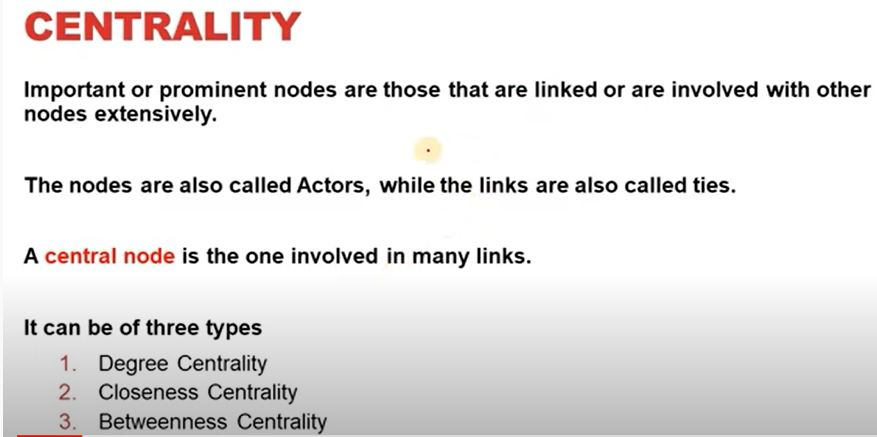

#### **1. Degree centrality**
One of the most common and simple centrality metrics is the degree centrality metric.  This is directly connected with the ***degree*** of a node, measuring the number of incident edges on a certain node ***i***.

Intuitively, the more a node is connected to an other node, the more its degree centrality will assume high values. 

Note that, if a graph is **directed**, the ***in-degree centrality*** and ***out-degree centrality*** will be considered for each node, related to the number of incoming and outcoming edges, respectively

[Link analysis: Degree centrality of nodes in a directed and undirected graph (3 min youtube)](https://www.youtube.com/watch?v=wMJ-tm0qM98)

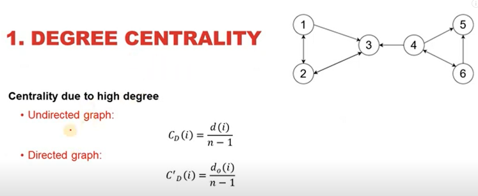

In [32]:
nx.degree_centrality(G)

{1: 0.3333333333333333,
 2: 0.3333333333333333,
 3: 0.5,
 4: 0.3333333333333333,
 5: 0.5,
 6: 0.3333333333333333,
 7: 0.3333333333333333}

,Dublin,Paris,Milan,Rome,Naples,Moscow,Tokyo
Degree centrality,0.333333,0.333333,0.5,0.333333,0.5,0.333333,0.333333


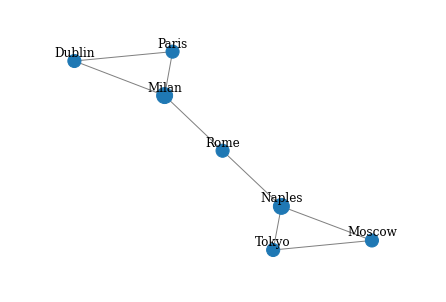

In [33]:
dc = nx.degree_centrality(G)
node_size=[(v + 0.01) * 500 for v in dc.values()]
#norm = np.linalg.norm(node_size)
#node_size = node_size / norm * 300
draw_graph(G, node_names=nodes, node_size=node_size,filename='deg_centr.png')

df = pd.DataFrame(dc,index=['Degree centrality'])
df.columns = nodes.values()
df

#### **2. Closeness Centrality**
[Link Analysis: Closeness centrality of anodes in a directed and undirected graph](https://www.youtube.com/watch?v=mYU_ql-hHTA)

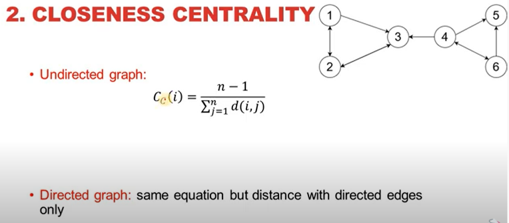

In [23]:
nx.closeness_centrality(G)

{1: 0.4,
 2: 0.4,
 3: 0.5454545454545454,
 4: 0.6,
 5: 0.5454545454545454,
 6: 0.4,
 7: 0.4}

,Dublin,Paris,Milan,Rome,Naples,Moscow,Tokyo
Closeness centrality,0.4,0.4,0.545455,0.6,0.545455,0.4,0.4


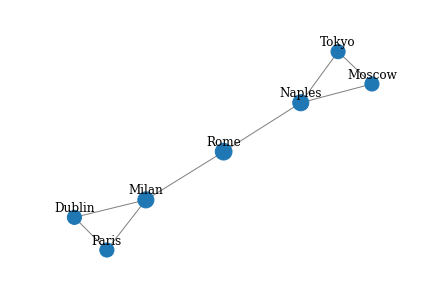

In [24]:
dc = nx.closeness_centrality(G)
node_size=[(v + 0.1) * 400 for v in dc.values()]
draw_graph(G, node_names=nodes, node_size=node_size,filename='clos_centr.png')

df = pd.DataFrame(dc,index=['Closeness centrality'])
df.columns = nodes.values()
df

In [25]:
nx.betweenness_centrality(G)

{1: 0.0,
 2: 0.0,
 3: 0.5333333333333333,
 4: 0.6,
 5: 0.5333333333333333,
 6: 0.0,
 7: 0.0}

,Dublin,Paris,Milan,Rome,Naples,Moscow,Tokyo
Betweenness centrality,0.0,0.0,0.533333,0.6,0.533333,0.0,0.0


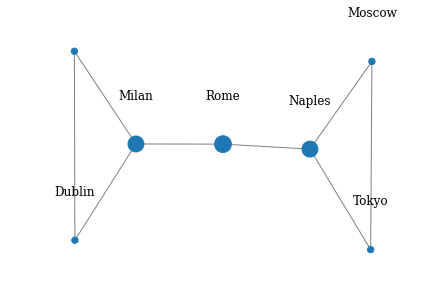

In [26]:
dc = nx.betweenness_centrality(G)
node_size=[(v + 0.1) * 400 for v in dc.values()]
draw_graph(G, node_names=nodes, node_size=node_size,filename='bet_centrality.png')

df = pd.DataFrame(dc,index=['Betweenness centrality'])
df.columns = nodes.values()
df

### Assortativity

In [27]:
nx.degree_pearson_correlation_coefficient(G)

-0.6

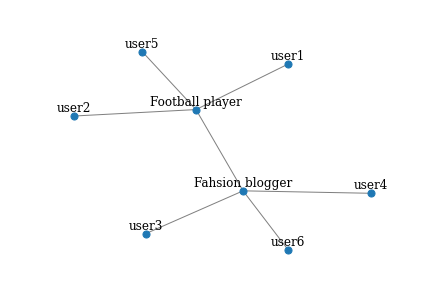

In [28]:
G = nx.Graph()
nodes = {1:'user1', 2:'user2', 3:'Football player', 4:'Fahsion blogger', 5:'user3', 6:'user4',
         7:'user5', 8:'user6'}
G.add_nodes_from(nodes.keys())
G.add_edges_from([(1,3),(2,3),(7,3),(3,4),(5,4),(6,4),(8,4)])

draw_graph(G, node_names=nodes,filename='assortativity.png')

In [29]:
nx.degree_pearson_correlation_coefficient(G)

-0.7500000000000001

### Modularity

In [30]:
import networkx.algorithms.community as nx_comm

G = nx.Graph()
nodes = {1:'Dublin',2:'Paris',3:'Milan',4:'Rome',5:'Naples',6:'Moscow',7:'Tokyo'}
G.add_nodes_from(nodes.keys())
G.add_edges_from([(1,2),(1,3),(2,3),(3,4),(4,5),(5,6),(6,7),(7,5)])

# partitions can be provided manually
print(nx_comm.modularity(G, communities=[{1,2,3,4},{5,6,7}]))

# or automatically computed using networkx
print(nx_comm.modularity(G, nx_comm.label_propagation_communities(G)))

0.3671875
0.3671875


### Transitivity

In [31]:
nx.transitivity(G)

0.5454545454545454